In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mrcfile
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

/Users/enriquecisneros/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
with mrcfile.open('Measured drift for 3D ED (hold ~ to stop)_t6.mrc') as mrc:
    Trial6 = mrc.data
    header6 = mrc.header
    
Trial6

array([[ 0.        , -0.33626232, -0.4645496 , -0.5103167 , -0.39838085,
        -0.35168225, -0.14677323,  0.09974466,  0.44723782,  0.809173  ,
         1.0281976 ,  1.1635957 ,  1.0871356 ,  1.1426437 ,  0.9516721 ,
         1.0101739 ,  0.94994974,  0.91482353,  0.86568373,  0.71949345,
         0.5410805 ,  0.45836866,  0.31290725,  0.27232793,  0.22251616,
         0.0788434 , -0.01047062, -0.16837676, -0.2074016 , -0.2935177 ,
        -0.4710031 , -0.51012635, -0.6925211 , -0.8649003 , -0.8481257 ,
        -0.9250479 , -1.0976963 , -1.2295736 , -1.3136244 , -1.4895563 ,
        -1.5100133 , -1.723932  , -1.9494299 , -2.0641723 , -2.0982234 ,
        -2.2667916 , -2.3037698 , -2.511796  , -2.5462513 , -2.6973667 ,
        -2.8373246 , -2.8448627 , -2.965894  , -3.0624154 , -3.0410125 ,
        -3.2964277 , -3.2949042 , -3.4289477 , -3.4476027 , -3.518624  ,
        -3.6273108 , -3.7715995 , -3.8417833 , -3.9240317 , -4.064844  ,
        -4.144085  , -4.2103434 , -4.351441  , -4.4

In [3]:
Trial6.shape

(2, 101)

In [4]:
Trial6[0,:]

array([ 0.        , -0.33626232, -0.4645496 , -0.5103167 , -0.39838085,
       -0.35168225, -0.14677323,  0.09974466,  0.44723782,  0.809173  ,
        1.0281976 ,  1.1635957 ,  1.0871356 ,  1.1426437 ,  0.9516721 ,
        1.0101739 ,  0.94994974,  0.91482353,  0.86568373,  0.71949345,
        0.5410805 ,  0.45836866,  0.31290725,  0.27232793,  0.22251616,
        0.0788434 , -0.01047062, -0.16837676, -0.2074016 , -0.2935177 ,
       -0.4710031 , -0.51012635, -0.6925211 , -0.8649003 , -0.8481257 ,
       -0.9250479 , -1.0976963 , -1.2295736 , -1.3136244 , -1.4895563 ,
       -1.5100133 , -1.723932  , -1.9494299 , -2.0641723 , -2.0982234 ,
       -2.2667916 , -2.3037698 , -2.511796  , -2.5462513 , -2.6973667 ,
       -2.8373246 , -2.8448627 , -2.965894  , -3.0624154 , -3.0410125 ,
       -3.2964277 , -3.2949042 , -3.4289477 , -3.4476027 , -3.518624  ,
       -3.6273108 , -3.7715995 , -3.8417833 , -3.9240317 , -4.064844  ,
       -4.144085  , -4.2103434 , -4.351441  , -4.4339747 , -4.52

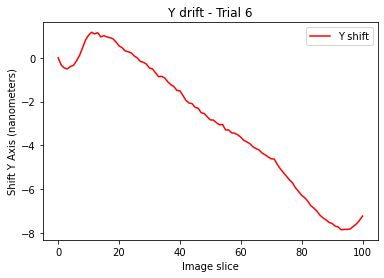

In [5]:
plt.plot(Trial6[0,:], label = 'Y shift', color = 'Red')
plt.xlabel('Image slice')
plt.ylabel('Shift Y Axis (nanometers)')#In Dm, output is placed in micrometers
plt.title('Y drift - Trial 6')
plt.legend()

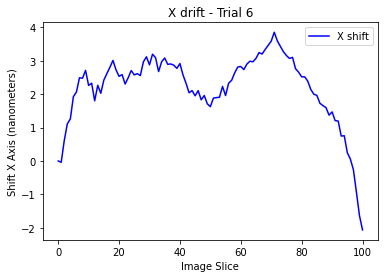

In [6]:
plt.plot(Trial6[1,:], label = 'X shift', color = 'blue')
plt.xlabel('Image Slice')
plt.ylabel('Shift X Axis (nanometers)')
plt.title('X drift - Trial 6')
plt.legend()

In [7]:
with mrcfile.open('Measured drift for 3D ED (hold ~ to stop)_t7.mrc') as mrc:
    Trial7 = mrc.data
    header7 = mrc.header
    
Trial7 #Index 0 is Y and index 1 is x

array([[ 0.        , -0.337512  , -0.48948008, -0.4656234 , -0.35796455,
        -0.2052759 ,  0.08878723,  0.5592131 ,  0.96743506,  1.490252  ,
         1.9500104 ,  2.1499958 ,  2.262094  ,  2.2804415 ,  2.3368044 ,
         2.3567142 ,  2.3910215 ,  2.4054322 ,  2.4361076 ,  2.3727546 ,
         2.3305078 ,  2.312367  ,  2.2542377 ,  2.2038443 ,  2.2131813 ,
         2.1140432 ,  2.060559  ,  1.9685591 ,  1.8946022 ,  1.8487391 ,
         1.7331078 ,  1.5852612 ,  1.5426073 ,  1.4076627 ,  1.3835055 ,
         1.3485618 ,  1.171364  ,  1.091538  ,  0.95970476,  0.81995857,
         0.79239684,  0.59380263,  0.41434738,  0.41539234,  0.28973967,
         0.18421601,  0.03867164, -0.16042246, -0.24547742, -0.3895813 ,
        -0.5995957 , -0.6814968 , -0.7980075 , -0.9069207 , -0.925682  ,
        -1.1671016 , -1.2822095 , -1.4177153 , -1.5517465 , -1.6186751 ,
        -1.7682059 , -1.9279964 , -2.039236  , -2.1656837 , -2.306724  ,
        -2.4871159 , -2.606807  , -2.7649443 , -2.9

In [8]:
with mrcfile.open('Measured drift for 3D ED (hold ~ to stop)_t8.mrc') as mrc:
    Trial8 = mrc.data
    header8 = mrc.header
    
Trial8

array([[ 0.0000000e+00, -3.1699440e-01, -4.5319960e-01, -3.9327970e-01,
        -2.5495392e-01, -9.3552127e-02,  1.6817166e-01,  5.5175805e-01,
         9.2473418e-01,  1.3914089e+00,  1.6422068e+00,  1.7722187e+00,
         1.7984234e+00,  1.7303830e+00,  1.7451707e+00,  1.7053756e+00,
         1.6945676e+00,  1.6534928e+00,  1.5707861e+00,  1.4943839e+00,
         1.3866658e+00,  1.2703133e+00,  1.2429651e+00,  1.1560246e+00,
         1.1615173e+00,  1.0228693e+00,  8.8634133e-01,  8.2639897e-01,
         7.7476293e-01,  6.0733074e-01,  5.7029319e-01,  4.2194381e-01,
         2.9725108e-01,  1.7851362e-01,  5.9456933e-02,  2.8781753e-02,
        -1.0186757e-01, -2.7049348e-01, -3.9975503e-01, -5.4397190e-01,
        -6.8546230e-01, -7.2803140e-01, -9.3503374e-01, -1.0537516e+00,
        -1.1262872e+00, -1.3347441e+00, -1.4972417e+00, -1.5856112e+00,
        -1.7389592e+00, -1.8679378e+00, -2.0394387e+00, -2.2021768e+00,
        -2.3135304e+00, -2.3124435e+00, -2.3917387e+00, -2.61701

In [9]:
def PlotData(data, trial, **kwargs):
    fig, ax = plt.subplots(1,2, **kwargs)
    ax[0].plot(data[0,:], label = trial+ ': Y shift', color = 'red')
    ax[1].plot(data[1,:], label = trial + ': X shift', color = 'blue')
    ax[0].set(ylabel = trial + ' Y-shift')
    ax[1].set(ylabel = trial + ' X-shift')
    for i in range(len(ax)):
        ax[i].set(title = 'Trial 6', xlabel = 'Image slice')
        plt.legend()
    
    

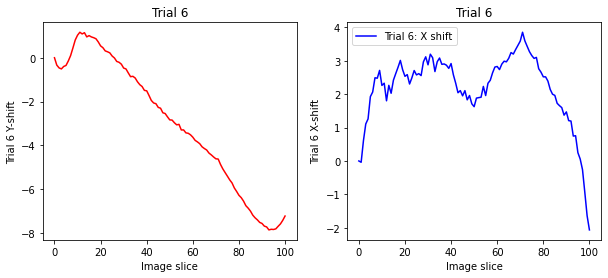

In [10]:
PlotData(Trial6, 'Trial 6', figsize = (10,4))

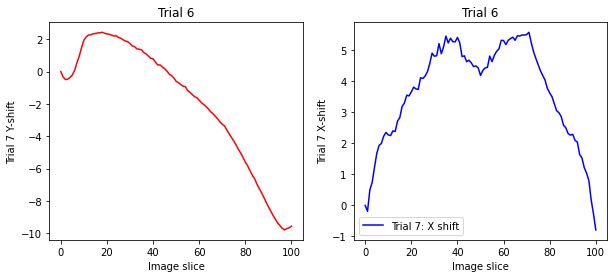

In [11]:
PlotData(Trial7, 'Trial 7', figsize = (10,4))

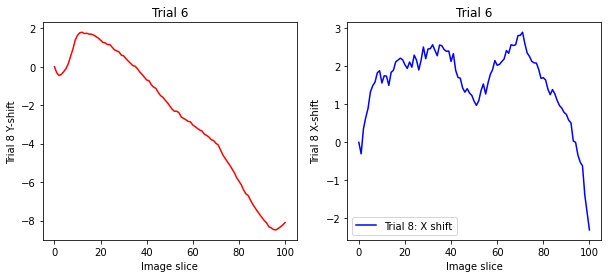

In [12]:
PlotData(Trial8, 'Trial 8', figsize = (10,4))

Text(0, 0.5, 'Shift (nanometers)')

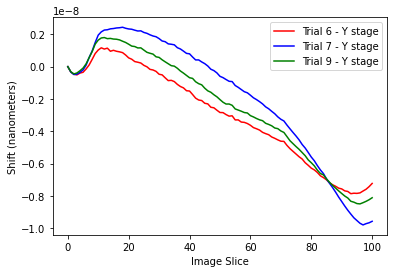

In [13]:
plt.plot(Trial6[0,:] * 1e-9, color = 'red', label = 'Trial 6 - Y stage')
plt.plot(Trial7[0,:] * 1e-9, color = 'blue', label = 'Trial 7 - Y stage')
plt.plot(Trial8[0,:] * 1e-9, color = 'green', label = 'Trial 9 - Y stage')
plt.legend()
plt.xlabel('Image Slice')
plt.ylabel('Shift (nanometers)')

Text(0, 0.5, 'Shift (nanometers)')

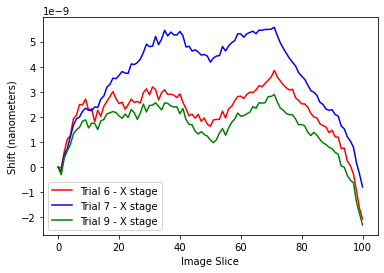

In [14]:
plt.plot(Trial6[1,:] * 1e-9, color = 'red', label = 'Trial 6 - X stage')
plt.plot(Trial7[1,:] * 1e-9, color = 'blue', label = 'Trial 7 - X stage')
plt.plot(Trial8[1,:] * 1e-9, color = 'green', label = 'Trial 9 - X stage')
plt.legend()
plt.xlabel('Image Slice')
plt.ylabel('Shift (nanometers)')

In [15]:
def PID_algorithm(Kp, Ki, Kd, data):
    measurement = data
    setpoint = 0
    offset = 0  # incase there is an offset in the data
    e = setpoint - measurement  # Error (difference between desired and measured values)
   
    P = Kp * e
    I = Ki * np.cumsum(e)
    D = Kd * np.diff(e, prepend=0)#Prepend first element to make size match
    

    
    # PID control output
    PID = measurement + P + I + D  # Element-wise addition of the three terms
    
    # Plotting the PID output and original data
    plt.plot(PID, color='orange', label='PID Output')
    plt.plot(data, color='blue', label='Original Data')
    plt.legend()
    plt.show()


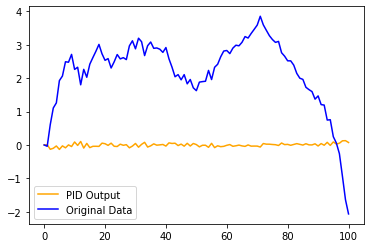

In [16]:
PID_algorithm(1,0.00005,0.2, Trial6[1,:])

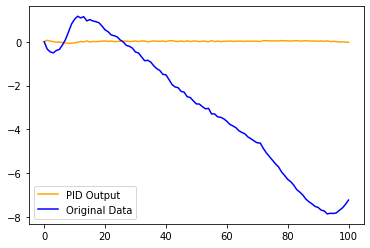

In [17]:
PID_algorithm(1,0.00005,0.2, Trial6[0,:])

In [18]:
def PID_algorithm2(Kp, Ki, Kd, data):
    measurement = data
    dt = 1 #In this case dt is 1 because its even incriments between each image taken
    setpoint = 0
    offset = 0  #incase there is an offset in the data
    e = setpoint - measurement  #Error (difference between desired and measured values)
   
    P = Kp * e
    I = 0
    I += Ki * e * dt 
    D = Kd * np.diff(e, prepend=0)#Prepend first element to make size match
    

    
    # PID control output
    PID = measurement - P + I + D 
    
    # Plotting the PID output and original data
    plt.plot(PID, color='orange', label='PID Output')
    plt.plot(data, color='blue', label='Original Data')
    plt.legend()
    plt.show()



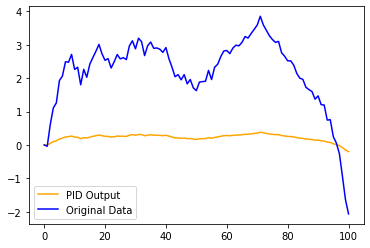

In [19]:
PID_algorithm2(0.1,1,0.02, Trial6[1,:])

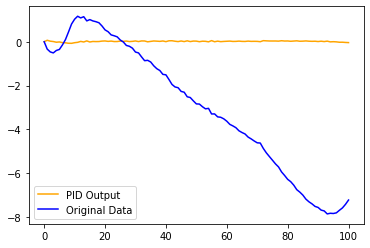

In [20]:
PID_algorithm2(0.1,1.1,0.2, Trial6[0,:])

In [21]:
#trying to find the best coefficients
#Since function requires x and y, will create evenly spaced values of 1 the size of the data

In [22]:
import PID_V2
from PID_V2 import PID_Controller

In [24]:
Trial6PIDTest = PID_Controller(0.1,1,0.02,0.1,1.1,0.2,1,1, Trial6)